<a href="https://colab.research.google.com/github/SebastianYanezV/ADA-Informes/blob/main/Informe_5_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema: Problema de selección

**Entrada**: Conjunto de $n$ números diferentes $A$, más un índice $i$.

**Salida**: Elemento $x\in A$, que es mayor a exactamente $i-1$ elementos de $A$ ($x$ corresponde al **estadístico de orden $i$-ésimo** para el conjunto $A$).

El problema que se busca resolver en este caso, corresponde al problema de selección, el cual consiste en encontrar al i-ésimo menor elemento del conjunto de entrada $A$. Para resolver este problema, se utilizará el algoritmo *Select*, el cual se encarga de buscar al i-ésimo menor elemento mediante un cálculo favorable del pivote a utilizar en cada llamada recursiva.

# 2. Select

## 2.1 Código

El código que se muestra a continuación pertenece al algoritmo *Select*, el cual contiene las funciones *InsertionSort*, *Partition*, *PivotSelection* y *Select*.

In [151]:
import math
comparaciones = 0

def insertionSort(A):
  global comparaciones
  largo = len(A)
  for i in range(1, largo): 
    key = A[i] 
    for k in range(i - 1, -1, -1): 
      if (A[k] < key): 
        comparaciones += 1
        A[k+1] = key
        break;
      A[k+1] = A[k] 
    if (key < A[0]):  
      comparaciones += 1
      A[0] = key   
  return A

def partition(A, inicio, final):
  global comparaciones
  i = -1
  j = 0
  pivote = A[final]
  while(True):
    if(j == final): break
    if(A[j] > pivote):
      comparaciones += 1
      j += 1
    else:
      comparaciones += 1
      aux = A[j]
      A[j] = A[i + 1]
      A[i + 1] = aux
      i += 1
      j += 1
  aux = A[final]
  A[final] = A[i + 1]
  A[i + 1] = aux
  q = i + 1
  return q

def pivotSelection(A, inicio, final, verbose = False):
  global comparaciones
  if verbose == True: print("Se entra a pivotSelection.")
  #Caso base, si el arreglo contiene 5 o menos elementos, se ordena y retorna su mediana inmediatamente
  if (len(A) <= 5): 
    comparaciones += 1
    A = insertionSort(A)
    if verbose == True: print("Se retorna la mediana:", A[len(A)//2])
    return A[len(A)//2]

  #Se calcula el total de grupos que contiene el arreglo
  grupos = math.ceil((final - inicio + 1) / 5)
  indiceMedianas = []
  medianas = []

  for k in range(grupos):
    subRangoLow = inicio + 5 * k
    subRangoHigh = inicio + 4 + 5 * k

    if (subRangoHigh > final): 
      comparaciones += 1
      subRangoHigh = final
    
    #Se obtiene cada grupo y se ordena usando InsertionSort
    A[subRangoLow:subRangoHigh+1] = insertionSort(A[subRangoLow:subRangoHigh+1])
    #Se obtiene la posición de la mediana de cada grupo y se guarda en una lista que almacena estos índices
    indiceMedianas.append((subRangoHigh + subRangoLow) // 2)
    #Se almacena cada mediana en un arreglo de medianas
    medianas.append(A[indiceMedianas[k]])
  
  if verbose == True: print("Arreglo de medianas:", medianas)

  #Se usa recursivamente pivotSelection para encontrar la mediana de las medianas
  medianas = pivotSelection(medianas, 0, len(medianas) - 1)

  #Se guarda la mediana de medianas
  if(isinstance(medianas, int) == False): medianaDeMedianas = medianas[grupos//2]
  else: 
    return partition(A, inicio, final)

  #Se busca la posición de la mediana de medianas dentro del arreglo de índices de medianas
  for k in range(grupos):
    if (medianaDeMedianas == A[indiceMedianas[k]]):
      comparaciones += 1
      i = indiceMedianas[k]
      break
  
  #La mediana de medianas se cambia de posición al último lugar y luego se llama a Partition para que este retorne el pivote a utilizar en Select
  (A[final], A[i]) = (A[i], A[final])
  
  return partition(A, inicio, final)

def select(A, inicio, final, k, verbose = False):
  #Si el buscado está dentro de los límites permitidos del arreglo, se realiza la búsqueda
  if (k > 0 and k <= final - inicio + 1):
    if verbose == True: print("Arreglo que entra al select:", A[inicio:final+1])
    q = pivotSelection(A, inicio, final)
    if verbose == True: print("Pivote retornado por pivotSelection:", q)
    if verbose == True: print("Arreglo al salir de pivotSelection:", A[inicio:final+1])
    if (q - inicio == k - 1): 
      if verbose == True: print("Se retorna el dato buscado, el cuál es:", A[q])
      if verbose == True: print("-------------------------------------------------------")
      return A[q]
    if (q - inicio > k - 1): 
      if verbose == True: print("El elemento buscado es menor que el pivote, se toma la parte izquierda del arreglo.")
      if verbose == True: print("-------------------------------------------------------")
      return select(A, inicio, q - 1, k)
    if verbose == True: print("El elemento buscado es mayor que el pivote, se toma la parte derecha del arreglo.")
    if verbose == True: print("-------------------------------------------------------")
    return select(A, q + 1, final, k - q + inicio - 1)

#Ejemplo
arreglo = [1, 10, 4, 9, 2, 3, 15, 8]
print("Arreglo de entrada:", arreglo)
buscado = 3
encontrado = select(arreglo, 0, len(arreglo) - 1, buscado)
print(f"El {buscado} menor elemento es: {encontrado}")
print("Comparaciones pivotSelection:", comparaciones)

Arreglo de entrada: [1, 10, 4, 9, 2, 3, 15, 8]
El 3 menor elemento es: 3
Comparaciones pivotSelection: 44


## 2.2 Descripción del algoritmo

Antes de empezar a buscar el i-ésimo elemento, el algoritmo recibe un arreglo de "n" elementos aleatorios y la posición del elemento a buscar.

En primer lugar, la función *select* se encarga de:

1. La función recibe el arreglo con el que se va a trabajar y sus índices inicial y final.

2. Se llama a la función *pivotSelection* para encontrar el mejor pivote con el que particionar al arreglo.

3. Si la posición del pivote coincide con la del elemento buscado, este se retorna y se finaliza el procedimiento. En caso contrario, la función *select* hace una llamada recursiva para seguir con la búsqueda hasta encontrar el elemento deseado.

En segundo lugar, la función *pivotSelection* se encarga de:

1. Divide el arreglo de entrada en sub-arreglos de 5 elementos cada uno (es probable que el último sub-arreglo posea menos de 5 elementos).

2. Cada vez que procesa un sub-arreglo de 5 elementos, se encarga de ordenarlo usando *insertionSort*.

3. Luego de ordenar el sub-arreglo, encuentra su mediana y la almacena en un arreglo de medianas.

4. Se aplica *pivotSelection* recursivamente para encontrar a la mediana del arreglo de medianas.

5. La mediana encontrada se utiliza como pivote, por lo que esta debe enviarse al final del arreglo para luego poder llamar a la función *partition* y retornar su resultado.

Finalmente, al terminar el proceso anteriormente descrito, el algoritmo retorna el i-ésimo menor elemento que se estaba buscando.

## 2.3 Ejemplo

Se ingresa el siguiente arreglo y el menor i-ésimo elemento a buscar:

A = [1, 10, 4, 9, 2, 3, 15, 8]

i = 3

Se entra a la función *select* y se llama a *pivotSelection* para encontrar el pivote con el que se dividirá al arreglo.

Dentro de *pivotSelection*, ocurre lo siguiente:

1. Se calcula la cantidad de grupos de 5 elementos que se pueden crear con el arreglo de entrada, en este caso, se pueden crear 2 grupos. Notar que el último grupo puede contener menos de 5 elementos.

2. Se crean estos grupos:

    a = [1, 10, 4, 9, 2]

    b = [3, 15, 8]

3. Se ordena cada grupo usando *insertionSort*:

    a = [1, 2, 4, 9, 10]

    b = [3, 8, 15]

4. Se obtiene la mediana de cada grupo y se almacena en un arreglo de medianas:

    medianas = [4, 8]

5. Se llama de forma recursiva a pivotSelection para encontrar la mediana del arreglo de medianas, por lo que los pasos anteriores se repiten.

    medianaDeMedianas = 8

6. Se usa a la mediana de medianas como pivote para la función *partition*. El dato retornado por esta función se utiliza como pivote para continuar la búsqueda en el *select*. 

    pivote retornado =  7

El proceso anterior se repite hasta encontrar al elemento buscado. Si la posición del buscado es igual al pivote, entonces se encontró, por lo que se retorna, sino, se debe ver si el buscado es mayor o menor, esto con el fin de saber que parte del arreglo de entrada se trabajará a continuación.

Finalmente se retorna el elemento buscado, en este caso, 3.

## 2.4 Ejecución del algoritmo paso a paso

In [95]:
comparaciones = 0
A = [1, 10, 4, 9, 2, 3, 15, 8]
print("Arreglo de entrada:", A)
print("-------------------------------------------------------")
buscado = 3
encontrado = select(A, 0, len(A) - 1, buscado, verbose = True)
print(f"El {buscado} menor elemento es: {encontrado}")
print("Comparaciones pivotSelection:", comparaciones)

Arreglo de entrada: [1, 10, 4, 9, 2, 3, 15, 8]
-------------------------------------------------------
Arreglo que entra al select: [1, 10, 4, 9, 2, 3, 15, 8]
Se entra a pivotSelection.
Arreglo de medianas: [4, 8]
Se entra a pivotSelection.
Se retorna la mediana: 8
Pivote retornado por pivotSelection: 7
Arreglo al salir de pivotSelection: [1, 2, 4, 9, 10, 3, 8, 15]
El elemento buscado es menor que el pivote, se toma la parte izquierda del arreglo.
-------------------------------------------------------
Arreglo que entra al select: [1, 2, 4, 9, 10, 3, 8]
Se entra a pivotSelection.
Arreglo de medianas: [4, 3]
Se entra a pivotSelection.
Se retorna la mediana: 4
Pivote retornado por pivotSelection: 4
Arreglo al salir de pivotSelection: [1, 2, 4, 3, 8, 9, 10]
El elemento buscado es menor que el pivote, se toma la parte izquierda del arreglo.
-------------------------------------------------------
Arreglo que entra al select: [1, 2, 4, 3]
Se entra a pivotSelection.
Arreglo de medianas: [2]
S

Como se puede ver en el ejemplo anterior, con cada llamada recursiva que ocurre, el arreglo que entra al *select* va disminuyendo su tamaño hasta encontrar al elemento buscado. Lo anterior ocurre debido a que, luego de encontrar un pivote en *pivotSelection*, y de ordenar al arreglo con los menores a ese pivote a la izquierda y los mayores a su derecha, el arreglo necesita verificar si la posición del elemento buscado es mayor o menor que el pivote para ver con que lado del arreglo sigue trabajando.

# 3. Tiempo de ejecución

##Teorema: tiempo de ejecución

El algoritmo *Select* tiene un tiempo de ejecución de $O(n^2)$ en su **peor caso** y un tiempo de $O(n)$ en su **caso promedio**.

##Prueba del teorema

El algoritmo *Select*, pese a ser un algoritmo recursivo, no tiene un tiempo de ejecución de $O(nlogn)$, ya que, en cada recursión, sólo procesa un lado del arreglo de entrada y no ambos. Lo anterior lleva a que este algoritmo tenga un tiempo de ejecución promedio de $O(n)$ cuando el pivote retornado por *pivotSelection* es la mediana o un número cercano a esta. Sin embargo, este algoritmo también tiene la pequeña posibilidad de que su tiempo de ejecución aumente a $O(n^2)$, caso que ocurre cuando el pivote escogido es igual al menor o mayor elemento del arreglo de entrada.

A continuación se verificará que el **teorema maestro** se puede utilizar para encontrar el tiempo de ejecución promedio de este algoritmo.

1. Antes de utilizar este teorema, es necesario verificar que la función de recurrencia de este algoritmo es de la forma $T(n) = aT(n/b) + f(n^d)$.

2. En este algoritmo, si se considera su caso promedio, el problema se divide cada vez en 1 sub problema de tamaño 1/2 del problema original de forma recursiva. Además, la función *pivotSelection* tiene un tiempo de ejecución de $O(n)$.

3. Al saber lo anterior, se puede concluir que la función de recurrencia de *Select* para su caso promedio es de la forma $T(n) = T(n/2) + O(n)$, por lo que se puede utilizar el teorema maestro para encontrar el tiempo de ejecución de este algoritmo.

A continuación se utilizará el **teorema maestro** para probar el teorema de tiempo de ejecución de este algoritmo.

1. Para encontrar el tiempo de ejecución, primero debemos visualizar las variables $a$, $b$ y $d$ en la función de recurrencia. En este caso son 1, 2 y 1 respectivamente.

2. Luego hay que evaluar si $a$ es igual, menor o mayor que $b^d$. Reemplazamos y queda que 1 < 2. Lo anterior significa que el tiempo de ejecución de *Select* es de la forma $O(n^d)$.

3. Finalmente, se reemplaza de nuevo en el tiempo de ejecución $O(n^d)$ y da que es igual a $O(n)$.

Finalmente, gracias al teorema maestro, se puede verificar que el tiempo de ejecución del algoritmo *Select* es igual a $O(n)$, por lo que su teorema de tiempo de ejecución es correcto.



# 4. Correctitud

## Teorema: Correctitud de la función InsertionSort

El algoritmo *Insertion Sort* genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del teorema

Gracias a los ejemplos anteriores, se puede observar que el sub arreglo que va desde la posición 0 hasta la posición "i - 1" en la que está el elemento "key" al inicio de la pasada, contiene todos los elementos originales leídos, pero ahora ordenados.

Por esto, se probará la siguiente propiedad del algoritmo *Insertion Sort*, la cuál corresponde a su **propiedad invariante de bucle**:

"Al comienzo de cada iteración del bucle más grande, el subarreglo A[0..i-1] contiene los mismos elementos que el arreglo original, pero ordenados de menor a mayor". 

**Inicialización**

Al inicio del algoritmo, i = 1 por lo que el sub arreglo [0, i-1] es igual a la posición 0, por lo que inmediatamente se puede saber que este sub arreglo se encuentra ordenado.

**Mantención**

Luego, se asume que cada vez que se itera, el sub arreglo [0, i-1] se encuentra ordenado y mantiene a los elementos del arreglo original. Luego, en cada pasada se toma al elemento leído de la posición "i" (key) y se lo mueve hasta su posición correcta. Por lo tanto, cada vez que este paso se termine de hacer, el sub arreglo [0, i-1] se encontrará ordenado y seguirá teniendo los elementos del arreglo original.

**Correctitud**

Finalmente, como las afirmaciones de la inicialización y mantención son correctas, se puede concluir que la propiedad invariante del bucle es correcta y se mantiene durante todo el algoritmo, por lo que el teorema de correctitud es correcto.

## Teorema: correctitud de la función Partition

La función *Partition* recibe un arreglo A[p..r], lo reorganiza y retorna un índice "q" de tal forma que los elementos del arreglo A[p..q-1] son menores o iguales a A[q] y los elementos del arreglo A[q+1..r] son mayores a A[q].

## Prueba del teorema

A continuación se utilizará la **propiedad invariante de bucle** de la función *partition* para probar su teorema de correctitud. Su propiedad invariante de bucle es la siguiente:

"Al comienzo de cada iteración, se cumple que para cualquier índice "k":

Si $p ≤ k ≤ i$, entonces $A[k] ≤ A[r]$

Si $i < k < j$, entonces $A[k] > A[r]$"

**Inicialización**

Antes de la primera iteración, el índice i = -1 y j = 0, por lo que "k" sólo puede ser menor que 0. Esto significa que tanto $A[k] ≤ A[r]$ como $A[k] > A[r]$ están vacíos (debido a que "k" no es un índice válido para el arreglo). Luego, durante la primera iteración, se comparará el elemento de la posición "j" con el pivote y luego, dependiendo del resultado de la comparación, el elemento de la posición "j" será agregado al conjunto que va desde "p" hasta "i" o al conjunto que va desde "i" hasta "j", dependiendo de si este es menor o mayor que el pivote.

**Mantención**

Después de la n-ésima iteración, el índice "j" será igual a "n - 1" y se cumplirá que $i < j < r$, entonces para el conjunto de los números A[k] con $p ≤ k ≤ i$, este contendrá $(i - p) + 1$ elementos $A[k] ≤ A[r]$ y para el conjunto $i < k < j$ el conjunto contendrá $(j - i) + 1$ elementos $A[k] > A[r]$.

**Correctitud**

Finalmente, al ser correctas tanto la inicialización como la mantención y al reorganizar el arreglo de entrada y retornar el índice "q" que lo divide en un lado con elementos menores a este y otro con elementos mayores a este, se concluye que el teorema de correctitud de la función *Partition* es correcto.

## Teorema: correctitud de la función PivotSelection

La función *pivotSelection* recibe un arreglo de entrada, junto a sus índices inicial y final y retorna un pivote que sirva para particionar a este mismo arreglo.

## Prueba del teorema

Debido a que este algoritmo es uno del tipo recursivo, para poder comprobar el teorema anterior se deberá utilizar inducción matemática.

**Caso base (n = 1)**

Cuándo el arreglo de entrada es de tamaño 1, la función retorna el único elemento que contiene este arreglo.

**Paso inductivo (n > 1)**

Se asume que *PivotSelection* es correcto para casos m < n. Cuándo el arreglo de entrada es de un tamaño n > 1, el algoritmo calcula la cantidad de grupos de 5 elementos que se pueden formar con los elementos del arreglo de entrada, calcula la mediana de cada grupo y la almacena en un arreglo de medianas. Luego la función procesa de forma recursiva a este arreglo de medianas con el fin de encontrar a la mediana de medianas. Como el algoritmo procesa arreglos cada vez más pequeños a medida que se acerca a la mediana de medianas, los cuáles tienen un tamaño m < n, se asume que el paso inductivo es correcto.

**Correctitud**

Finalmente, como el caso base y paso inductivo son correctos, y sabiendo que la función *partition* retorna un pivote que se utilizará para dividir al arreglo de entrada y así procesar el lado que se necesite, se concluye que el teorema de correctitud del algoritmo es correcto.

## Teorema: correctitud del algoritmo Select

El algoritmo *Select* recibe un arreglo de "n" elementos como entrada y una menor posición i-ésima a buscar y retorna el elemento que se encuentra en esa posición.

## Prueba del teorema

Debido a que este algoritmo es uno del tipo recursivo, para poder comprobar el teorema anterior se deberá utilizar inducción matemática.

**Caso base (n = 1)**

Cuándo el arreglo de entrada es de tamaño 1, sólo hay un posible i-ésimo elemento que se pueda encontrar, el cuál corresponde al único elemento del arreglo. Debido a lo anterior, se procede a retornar este elemento. 

**Paso inductivo (n > 1)**

Se asume que *Select* es correcto para casos m < n. Cuándo el arreglo de entrada es de un tamaño n > 1, el algoritmo encuentra un pivote gracias a *pivotSelection* y luego procesa sólo un lado del arreglo de entrada de forma recursiva (ya que sólo interesa trabajar con el lado que contenga al i-ésimo menor elemento buscado). Como el algoritmo procesa arreglos cada vez más pequeños a medida que se acerca al elemento buscado, los cuáles tienen un tamaño m < n, se asume que el paso inductivo es correcto.

**Correctitud**

Finalmente, como el caso base y paso inductivo son correctos, y sabiendo que la función *pivotSelection* entrega un pivote que sirve para dividir al arreglo y así procesar el lado que se necesite, se concluye que el teorema de correctitud del algoritmo es correcto.

# 5. Experimentos

## 5.1 Cantidad de comparaciones

A continuación se muestra una gráfica en la que se comparan la cantidad de comparaciones entre el mejor caso y peor caso del algoritmo para tamaños de problemas con n ∈ [10, 50].

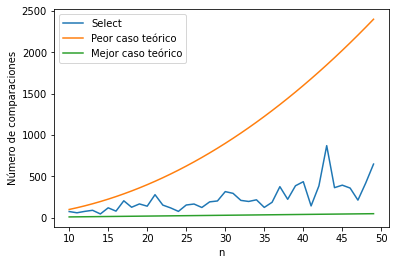

In [145]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(10,50)] 
y1=[n * n for n in range(10,50)] # Peor caso
y2=[n for n in range(10,50)] # Mejor caso
y=[]; 

for n in range(10,50):
  a = random.sample(range(1, 100), n)
  buscado = random.randint(1, len(a)-1)
  comparaciones = 0
  select(a, 0, len(a)-1, buscado)
  y.append(comparaciones)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

### Análisis de resultados

En el gráfico anterior se puede apreciar cómo las comparaciones en el peor caso llegan a la cota de $O(n^2)$, sin embargo, como este algoritmo tiene una selección eficiente de pivote, es poco probable que ocurra este caso, por lo que las comparaciones no deberían llegar a estas cantidades con frecuencia. Es por esto que las comparaciones se deberían mantener en un rango como es de la gráfica azul. 


## 5.2 Select v/s Randomized-Select 

### 5.2.1 Cantidad de comparaciones

A continuación se muestra una gráfica en la que se comparan la cantidad de comparaciones de los algoritmos *Select* y *Randomized-Select* para tamaños de problemas con n ∈ [10, 50].

In [146]:
def randomPivot(A, inicio, final):
  i = random.randint(inicio, final)
  (A[final], A[i]) = (A[i], A[final])
  return partition(A, inicio, final)

def randomSelect(A, inicio, final, k):
  if (k > 0 and k <= final - inicio + 1):
    q = randomPivot(A, inicio, final)
    if (q - inicio == k - 1): return A[q]
    if (q - inicio > k - 1): return select(A, inicio, q - 1, k)
    return select(A, q + 1, final, k - q + inicio - 1)

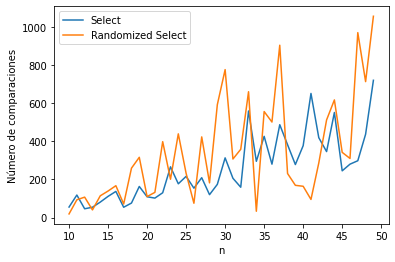

In [155]:
x=[n for n in range(10,50)] 
y=[]; 
z=[];

for n in range(10,50):
  a = random.sample(range(1, 100), n)
  buscado = random.randint(1, len(a)-1)

  comparaciones = 0
  select(a, 0, len(a)-1, buscado)
  y.append(comparaciones)

  comparaciones = 0
  randomSelect(a, 0, len(a)-1, buscado)
  z.append(comparaciones)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Select", "Randomized Select"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

### Análisis de resultados

En el gráfico anterior se puede ver cómo el algoritmo *Select* realiza una menor cantidad de comparaciones que *Randomized-Select*. Lo anterior se podría deber a que el primer algoritmo escoge el mejor pivote para hacer cada partición, por lo que realiza menos comparaciones más adelante en sus llamadas a *insertionSort* y *partition*. En cambio, *Randomized-Select*, al escoger un pivote aleatorio, es más probable que genere particiones ineficientes, lo que produciría que haga una mayor cantidad de comparaciones.

Cabe recalcar que cada gráfico varía constantemente debido a que en cada llamada a cada algoritmo se buscan distintos i-ésimos elementos, lo que afecta la cantidad de comparaciones en cada momento, sin embargo, ambos algoritmos siempre trabajan con el mismo arreglo generado y con el mismo i-ésimo elemento a buscar, por lo que la representación de compararciones debería ser correcta.


### 5.2.2 Tiempo de ejecución

En el gráfico que se muestra a continuación se visualizan los tiempos de ejecución de los algoritmos *Select* y *Randomized-Select* en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 10 y 500.



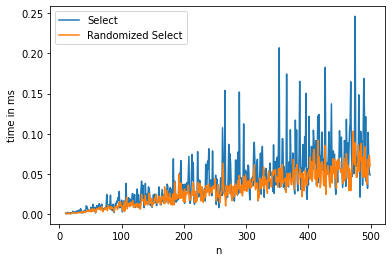

In [149]:
import datetime
from timeit import repeat

x=[]; y=[]
z=[]; w=[]

for n in range(10,500):

  a = random.sample(range(1, 1000), n)
  buscado = random.randint(1, len(a)-1)

  #la función repeat está ejecutando 20 veces select y randomSelect con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import select", stmt=f"select({a}, {0}, {len(a)-1}, {buscado})", repeat=1, number=20)
  t2 = repeat(setup="from __main__ import randomSelect", stmt=f"randomSelect({a}, {0}, {len(a)-1}, {buscado})", repeat=1, number=20)

  x.append(n)
  y.append(t)

  z.append(n)
  w.append(t2)


plt.plot(x,y)
plt.plot(z,w)
plt.legend(["Select", "Randomized Select"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

En el gráfico anterior se puede apreciar que, pese a que el algoritmo *Select* tiene un funcionamiento mejor según la teoría, este tiene un tiempo de ejecución mayor que *Randomized-Select*. Lo anterior ocurre debido a que, si bien *Select* escoge al mejor pivote posible para hacer cada partición, el proceso para encontrar a este pivote es bastante lento, por lo que termina por hacer que este algoritmo funcione un poco más lento que su versión random. Por otro lado, pese a que *Randomized-Select* escoge un pivote aleatorio, la elección de este pivote es mucho más rápida que en *Select*, lo que genera que este algoritmo se ejecute más rápido.